<a href="https://colab.research.google.com/github/Pravinkumar2629/dl_repo/blob/master/housing_data_pn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive

In [0]:
#uploaded_arr = files.upload()

In [0]:
import io

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/datasets/kc_house_data.csv'

In [0]:
#uploaded_arr

In [0]:
#df_ = pd.read_csv(io.BytesIO(uploaded_arr['kc_house_data.csv']))

In [0]:
df_ = pd.read_csv(path)

In [0]:
#df_ =  pd.read_csv('../../DATA/kc_house_data.csv')

In [0]:
# Let's make a copy of original data 

df = df_.copy()

In [0]:
pd.set_option('display.max_columns', None)

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Target is price and other fields are features

In [0]:
#df.summary

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### No null values

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


#### Don't want to see scientific numbers

In [0]:
pd.set_option('display.float_format', lambda value: format(value,'0.3f'))

In [40]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


In [0]:
plt.rcParams['patch.force_edgecolor'] = True

(0.0, 3000000.0)

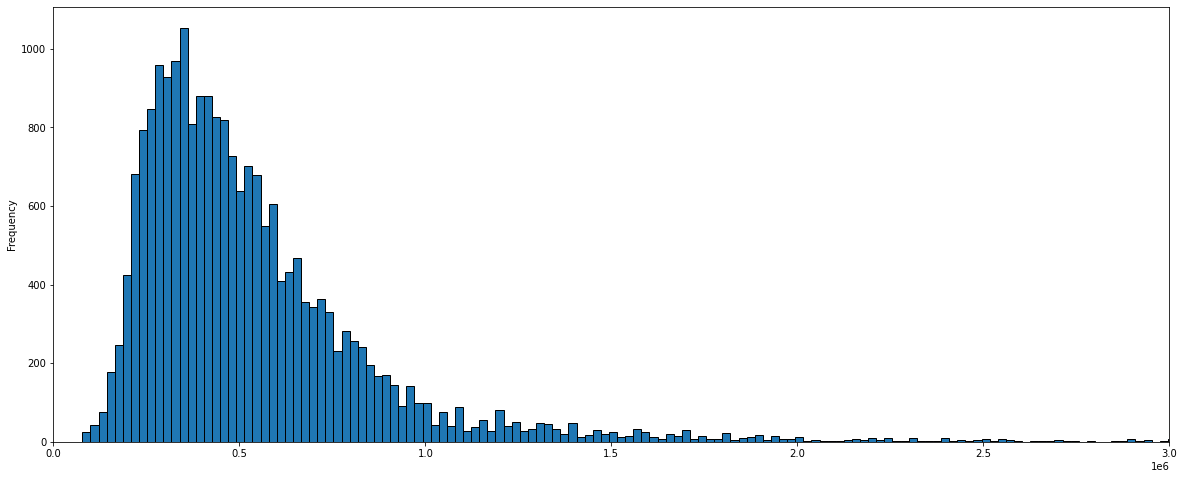

In [42]:
df['price'].plot(kind='hist', bins=350, figsize=(20,8))
plt.xlim(0,3000000)

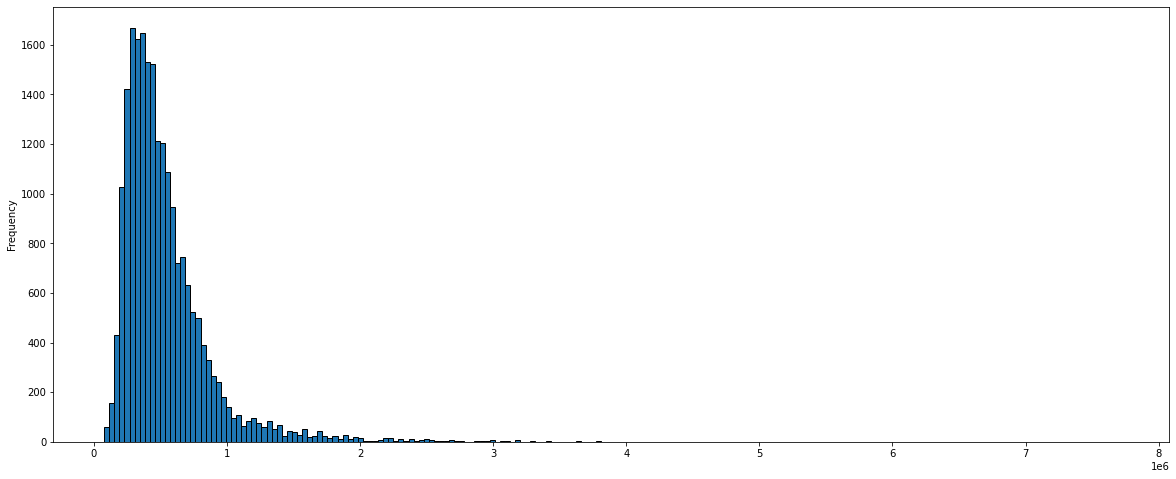

In [43]:
df['price'].plot(kind='hist', bins=200, figsize=(20,8))

In [44]:
df.corr()['price'].sort_values()

zipcode         -0.053
id              -0.017
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

In [0]:
#df['zipcode'].value_counts()

#### as zip codes are just increasing positive number, our model is confused to get the correlation with it

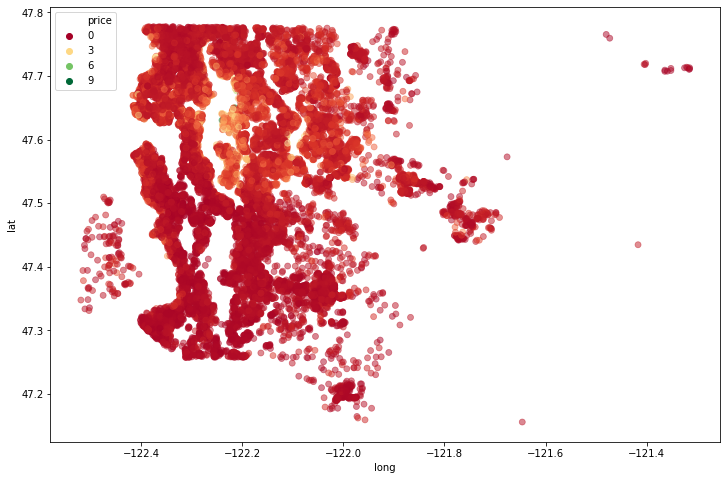

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, alpha=0.5,edgecolor=None, palette='RdYlGn',hue='price')

In [47]:
len(df) * 0.01

215.97

In [48]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


In [0]:
df_without_top1PC = df.sort_values('price', ascending=False).iloc[216:]

In [0]:
df_without_top_2PC = df.sort_values('price', ascending=False).iloc[432:]

Text(0.5, 1.0, 'pirce distribution without top one percent')

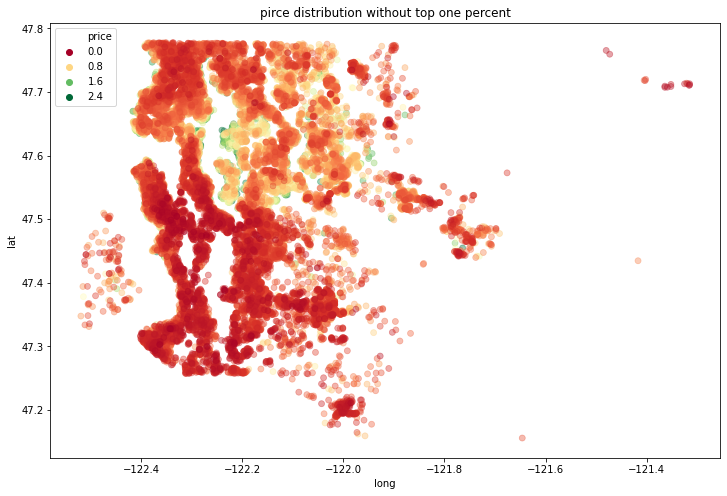

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df_without_top1PC, hue='price', alpha=0.4
               ,edgecolor=None, palette='RdYlGn')
plt.title('pirce distribution without top one percent')

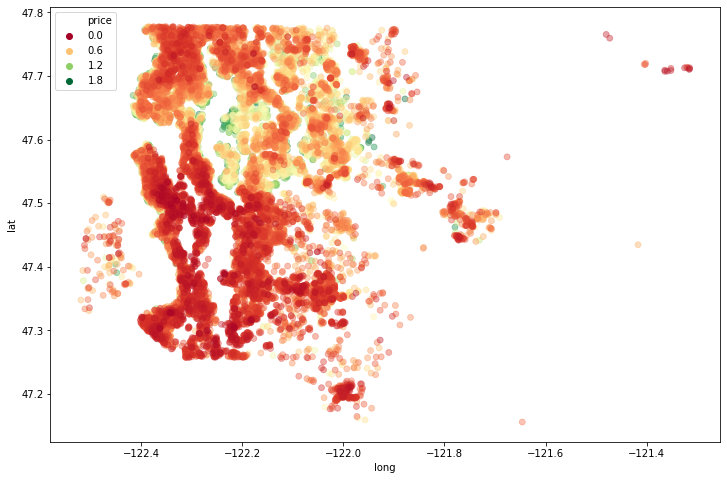

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df_without_top_2PC, hue='price', alpha=0.4
               ,edgecolor=None, palette='RdYlGn')

**Latitude & Longitude**

Lat long coordinates have a problem that they are 2 features that represent a three dimensional space. This means that the long coordinate goes all around, which means the two most extreme values are actually very close together. I've dealt with this problem a few times and what I do in this case is map them to x, y and z coordinates. This means close points in these 3 dimensions are also close in reality. Depending on the use case you can disregard the changes in height and map them to a perfect sphere. These features can then be standardized properly.

**To clarify (summarised from the comments):**

x = cos(lat) * cos(lon)

y = cos(lat) * sin(lon), 

z = sin(lat) 

https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature

### okay let's do some additional processing over longitude and latitude

##### gonna do a clustering with this data

### And place it another notepad

In [53]:
df.corr()['price'].sort_values()

zipcode         -0.053
id              -0.017
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [55]:
df.waterfront.value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [56]:
df.floors.value_counts()

1.000    10673
2.000     8235
1.500     1910
3.000      611
2.500      161
3.500        7
Name: floors, dtype: int64

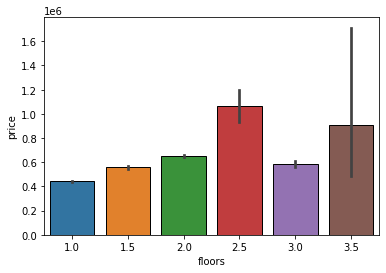

In [57]:
#plt.figure(figsize=(12,8))
sns.barplot(x='floors', y='price', data=df)

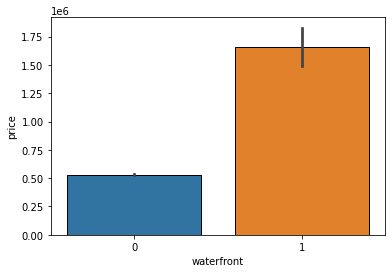

In [58]:
sns.barplot(x='waterfront', y='price', data=df)

In [59]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

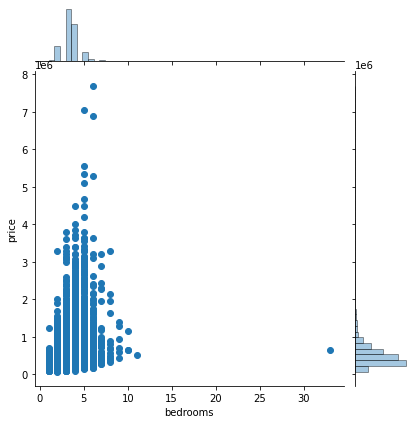

In [60]:
sns.jointplot(x='bedrooms', y='price', data=df)

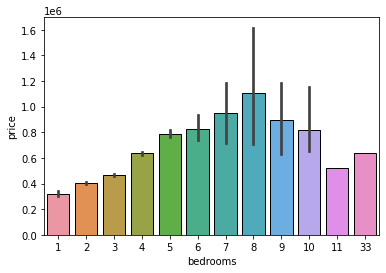

In [61]:
sns.barplot(x='bedrooms', y='price', data=df)

In [62]:
df.view.value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

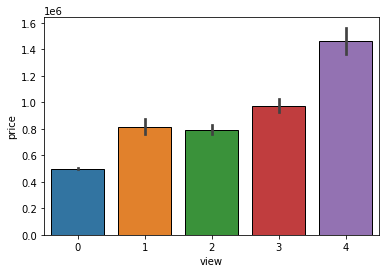

In [63]:
sns.barplot(x='view', y='price', data=df)

In [0]:
#plt.plot(df.view.value_counts())

In [0]:
#df.plot.hexbin(x='price',y='view', gridsize=5 )

In [66]:
df.view.value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [67]:
df.price.value_counts()

350000.000    172
450000.000    172
550000.000    159
500000.000    152
425000.000    150
             ... 
870515.000      1
336950.000      1
386100.000      1
176250.000      1
884744.000      1
Name: price, Length: 3622, dtype: int64

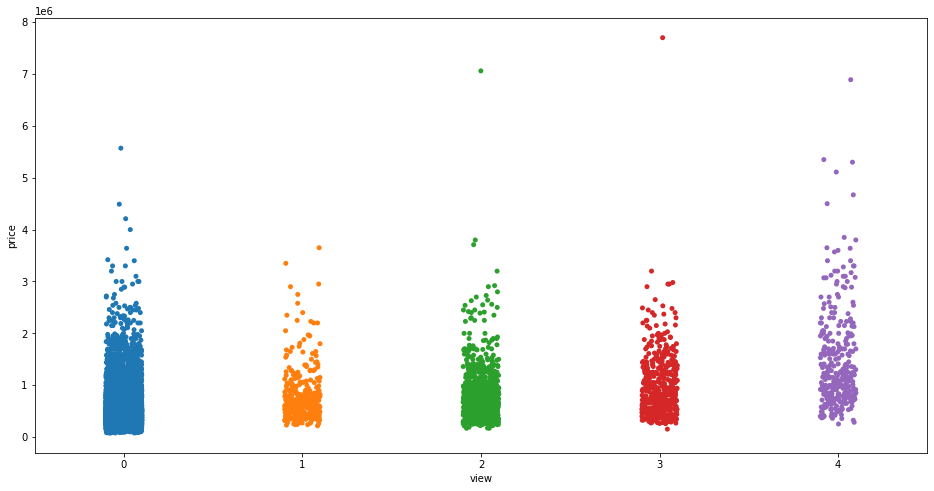

In [68]:
plt.figure(figsize=(16,8))
sns.stripplot(x='view', y='price', data=df)

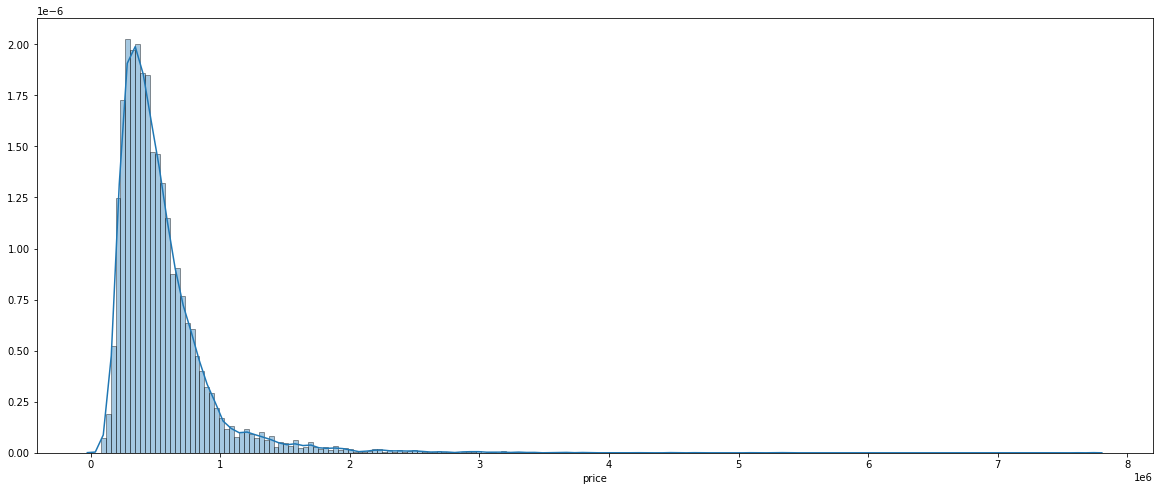

In [69]:
plt.figure(figsize=(20,8))
sns.distplot(df['price'], bins=200)

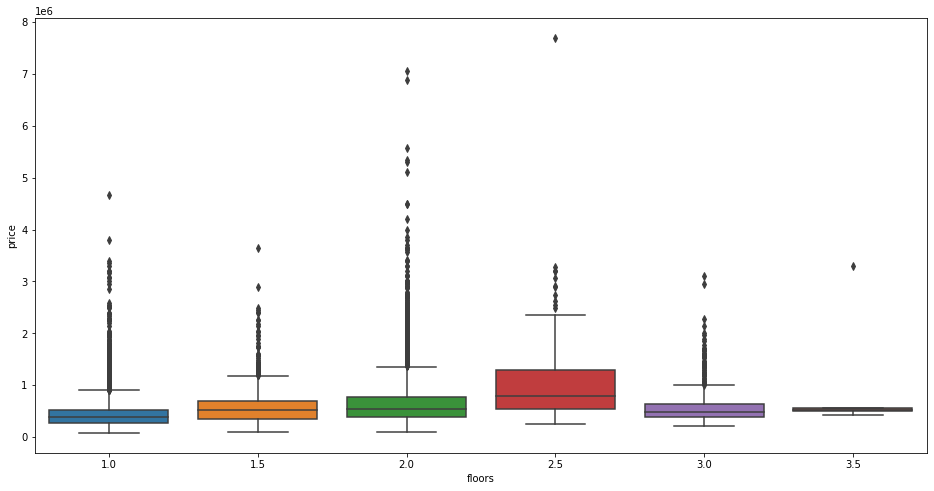

In [70]:
plt.figure(figsize=(16,8))
sns.boxplot(x='floors',y='price',data=df)

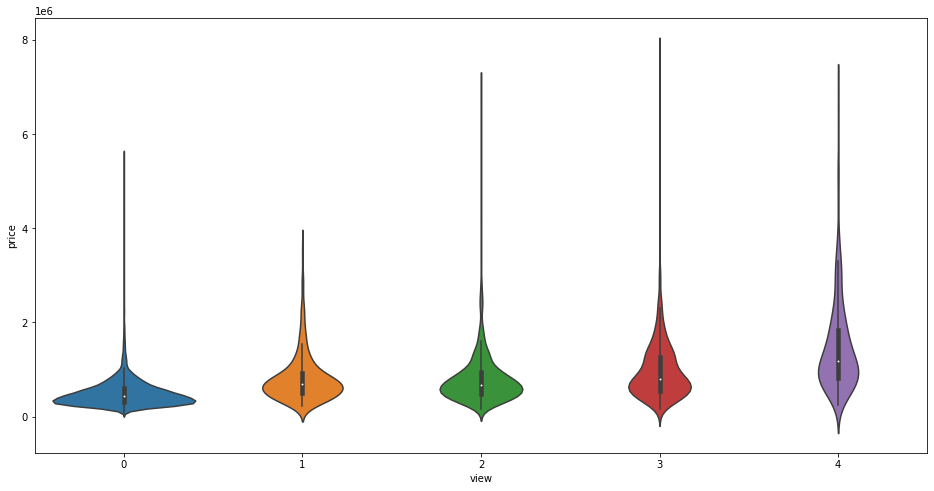

In [71]:
plt.figure(figsize=(16,8))
sns.violinplot(x='view', y='price', data=df)

In [72]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [73]:
df.corr()['price'].sort_values()

zipcode         -0.053
id              -0.017
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

In [0]:
df.drop('id', axis=1, inplace=True)

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df['monht'] = df['date'].apply(lambda date: date.month)

In [0]:
df['year'] = df['date'].apply(lambda date: date.year)

In [0]:
df.drop('date', axis=1, inplace=True)

#### Let's do train test split

In [0]:
from sklearn.model_selection import train_test_split

In [80]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [81]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,monht,year
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,10,2014
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,12,2014
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2,2015
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,12,2014
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2,2015


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis=1).values, df['price'].values, test_size=0.3, random_state=29 )

In [83]:
print(X_train.shape, y_train.shape)

(15117, 20) (15117,)


In [84]:
print(X_test.shape, y_test.shape)

(6480, 20) (6480,)


In [0]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Flatten

In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
def get_me_the_model():
  model = Sequential()

  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(1, activation='relu'))

  model.compile(optimizer='adam', loss='mse')

  return model

In [88]:
model = get_me_the_model()
model.fit(X_train, y_train, epochs=250, verbose=1)

Epoch 1/250
473/473 [==============================] - 1s 1ms/step - loss: 428316524544.0000
Epoch 2/250
473/473 [==============================] - 1s 1ms/step - loss: 428316229632.0000
Epoch 3/250
473/473 [==============================] - 1s 1ms/step - loss: 428316295168.0000
Epoch 4/250
473/473 [==============================] - 1s 1ms/step - loss: 428316655616.0000
Epoch 5/250
473/473 [==============================] - 1s 1ms/step - loss: 428316360704.0000
Epoch 6/250
473/473 [==============================] - 1s 1ms/step - loss: 428316491776.0000
Epoch 7/250
473/473 [==============================] - 1s 1ms/step - loss: 428316360704.0000
Epoch 8/250
473/473 [==============================] - 1s 1ms/step - loss: 428316622848.0000
Epoch 9/250
473/473 [==============================] - 1s 1ms/step - loss: 428316655616.0000
Epoch 10/250
473/473 [==============================] - 0s 1ms/step - loss: 428316164096.0000
Epoch 11/250
473/473 [==============================] - 1s 1ms/step -

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  420       
_________________________________________________________________
dense_1 (Dense)              multiple                  210       
_________________________________________________________________
dense_2 (Dense)              multiple                  55        
_________________________________________________________________
dense_3 (Dense)              multiple                  6         
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [92]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [93]:
y_pred.shape

(6480, 1)

In [94]:
y_test.shape

(6480,)

In [95]:
r2_score(y_test, y_pred)

-2.1816803339803714

In [96]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test, y_pred))

423507207865.5315
538886.9787037037


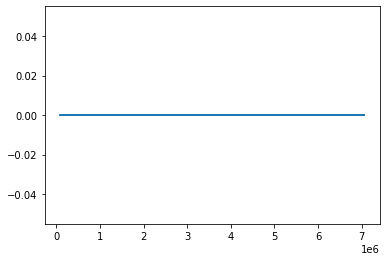

In [97]:
plt.plot(y_test, y_pred)

In [98]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,monht,year
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,10,2014
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,12,2014
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2,2015
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,12,2014
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2,2015


In [0]:
from sklearn.cluster import KMeans

In [0]:
kmean = KMeans(n_clusters=5)

In [0]:
zones = kmean.fit_predict(X=df[['lat','long']])

In [0]:
df['zones'] = zones

In [103]:
df.corr()['price'].sort_values()

zones           -0.079
zipcode         -0.053
monht           -0.010
year             0.004
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

In [0]:
df.drop(['zipcode', 'monht', 'long','lat'], axis=1, inplace=True)

In [0]:
del model

In [0]:
model = get_me_the_model()

In [0]:
model.fit(X_train, y_train, epochs=250, verbose=1)

In [0]:
y_pred = model.predict(X_test)

In [110]:
mean_squared_error(y_test, y_pred)

50408066158.805336

In [111]:
model.history.history

{}

In [0]:
#df_history = pd.DataFrame(model.history.history)

In [124]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,zones
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,1340,5650,2014,3
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1690,7639,2014,4
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,2720,8062,2015,4
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,1360,5000,2014,3
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,1800,7503,2015,1


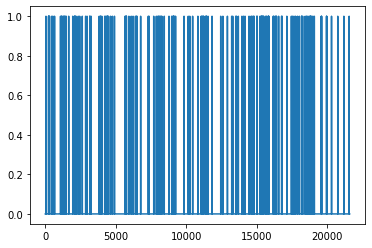

In [125]:
df.waterfront.plot()

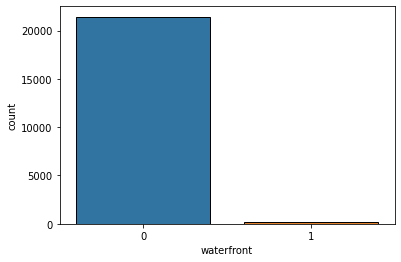

In [126]:
sns.countplot(x='waterfront', data=df)

In [127]:
df.waterfront.value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [129]:
df.corr()['price'].sort_values()

zones           -0.079
year             0.004
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

In [0]:
df[['lat','long']] = df_[['lat', 'long']].copy()

In [131]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,zones,lat,long
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,1340,5650,2014,3,47.511,-122.257
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1690,7639,2014,4,47.721,-122.319
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,2720,8062,2015,4,47.738,-122.233
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,1360,5000,2014,3,47.521,-122.393
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,1800,7503,2015,1,47.617,-122.045


In [133]:
df.corr()['price'].sort_values()

zones           -0.079
year             0.004
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

In [0]:
df.drop('zones', axis=1, inplace=True)

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
es = EarlyStopping(monitor='val_loss', patience=60, verbose=1, mode='min')

In [0]:
#EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [0]:
model_check_point = ModelCheckpoint('housing_data.h5',save_best_only=True, mode='min', monitor='val_loss')

In [0]:
#help(ModelCheckpoint)

In [245]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,lat,long
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,1340,5650,2014,47.511,-122.257
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,1690,7639,2014,47.721,-122.319
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,2720,8062,2015,47.738,-122.233
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,1360,5000,2014,47.521,-122.393
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,1800,7503,2015,47.617,-122.045


In [0]:
df_features = df.drop('price', axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
df_features_scaled = scaler.fit_transform(df_features)

In [0]:
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled.values, df['price'].values, random_state=29, test_size=0.3)

In [252]:
print(X_train.shape, y_train.shape)

(15117, 18) (15117,)


In [253]:
print(X_test.shape, y_test.shape)

(6480, 18) (6480,)


In [0]:
del model

In [0]:
model = get_me_the_model()

In [256]:
model.fit(X_train, y_train, epochs=300, callbacks=[es, model_check_point], verbose=1,validation_data=(X_test,y_test))

Epoch 1/300
473/473 [==============================] - 1s 2ms/step - loss: 428237553664.0000 - val_loss: 423101661184.0000
Epoch 2/300
473/473 [==============================] - 1s 2ms/step - loss: 425560637440.0000 - val_loss: 416383959040.0000
Epoch 3/300
473/473 [==============================] - 1s 2ms/step - loss: 410523631616.0000 - val_loss: 391135199232.0000
Epoch 4/300
473/473 [==============================] - 1s 2ms/step - loss: 371781599232.0000 - val_loss: 338752045056.0000
Epoch 5/300
473/473 [==============================] - 1s 2ms/step - loss: 306135629824.0000 - val_loss: 262414630912.0000
Epoch 6/300
473/473 [==============================] - 1s 2ms/step - loss: 223855280128.0000 - val_loss: 179571802112.0000
Epoch 7/300
473/473 [==============================] - 1s 2ms/step - loss: 150441984000.0000 - val_loss: 122500268032.0000
Epoch 8/300
473/473 [==============================] - 1s 2ms/step - loss: 111667953664.0000 - val_loss: 101593096192.0000
Epoch 9/300
473/

In [0]:
loss = model.history.history['loss']

In [0]:
val_loss = model.history.history['val_loss']

In [0]:
#model.history.history['loss']

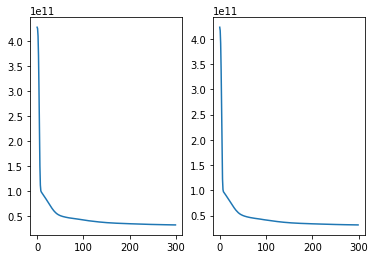

In [260]:
fig,[ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.plot(loss, label='train')
ax2.plot(val_loss, label='test')

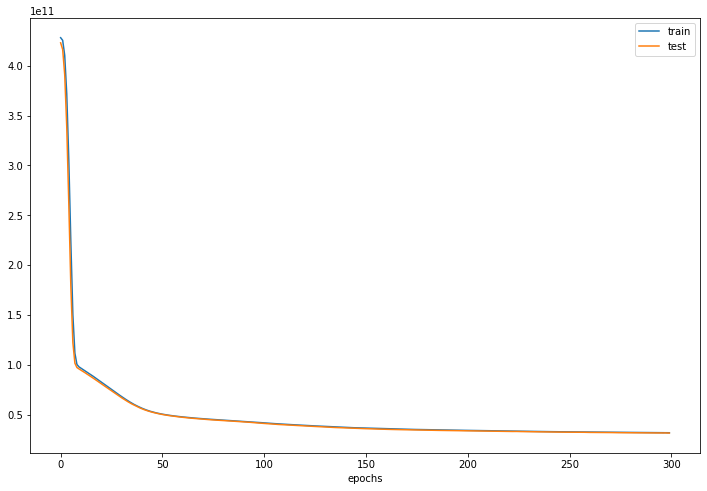

In [261]:
plt.figure(figsize=(12,8))
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('epochs')
#plt.xlim(0,400)
#plt.ylim(0,5)
plt.show()

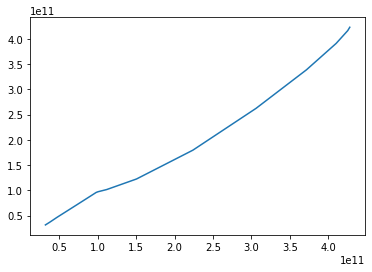

In [262]:
plt.plot(loss, val_loss)

In [0]:
from tensorflow.keras.models import load_model

In [0]:

saved_model = load_model('housing_data.h5')

In [0]:
y_pred = saved_model.predict(X_test)

In [266]:
mean_squared_error(y_test, y_pred)

31513020932.392372

In [267]:
len(y_pred[:,0])

6480

In [268]:
len(y_test)

6480

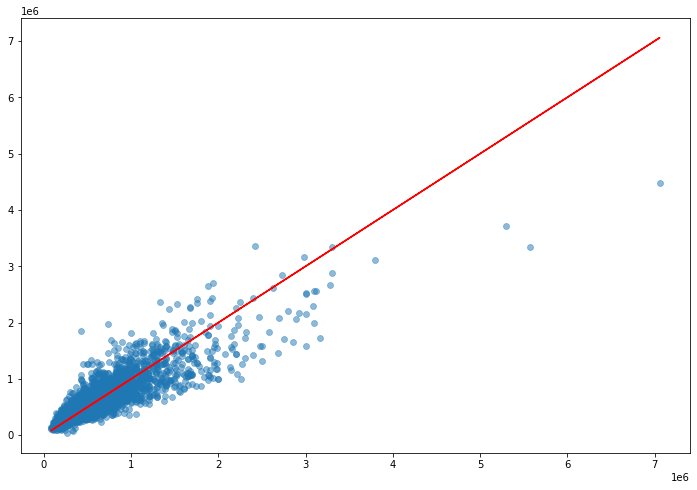

In [269]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=y_pred[:,0], edgecolor=None, alpha=.5)
plt.plot(y_test,y_test, c='red')
plt.show()

<h1>Ok Let's evalutate our model </h1>

https://stats.stackexchange.com/questions/142873/how-to-determine-the-accuracy-of-regression-which-measure-should-be-used

In [270]:
mean_squared_error(y_pred=y_pred, y_true=y_test)

31513020932.392372

In [271]:
np.sqrt(mean_squared_error(y_test,y_pred))

177519.07202436693

Let's cover other stuff later, this is fine

I think this is more than fine for a house prediction model, regression stuff